# Veri Bilimi için İstatistik

In [1]:
#İstatistik, veri biliminin "bilim", makine öğrenmesinin "öğrenme" kısmıdır.

# Betimsel İstatistikler

In [ ]:
#Ortalama, medyan, mod, kartiller, değişim aralığı, standart sapma
#Varyans: Ortalama etrafındaki dağılımın ölçüsüdür.
#Korelasyon: İki değişken arasındaki ilişkiyi, ilişkinin anlamlı olup olmadığını, şiddetini ve yönünü ifade eder.

In [15]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [17]:
#Betimsel analiz için bir diğer kütüphane:
!pip install researchpy
import researchpy as rp

In [18]:
#Sürekli değişkenler için:
rp.summary_cont(df[["total_bill","tip","size"]])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,total_bill,244.0,19.7859,8.9024,0.5699,18.6633,20.9086
1,tip,244.0,2.9983,1.3836,0.0886,2.8238,3.1728
2,size,244.0,2.5697,0.9511,0.0609,2.4497,2.6896


In [20]:
#Kategorik değişkenler için:
rp.summary_cat(df[["sex","smoker","day"]])

,Variable,Outcome,Count,Percent
0,sex,Male,157,64.34
1,,Female,87,35.66
2,smoker,No,151,61.89
3,,Yes,93,38.11
4,day,Sat,87,35.66
5,,Sun,76,31.15
6,,Thur,62,25.41
7,,Fri,19,7.79


In [22]:
#Korelasyon:
df[["tip","total_bill"]].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


In [ ]:
#Güven aralığı: Ölçümün hassasiyetinin bir göstergesidir. 
#Yapmış olduğumuz tahminlerin ne kadar güvenilir olduğuyla ilgili bir değer sunar.
#Örneğin: Web sitesinde geçirilen sürenin güven aralığı nedir:
#Ort: 180 sn ss=40 sn ----> İstatistiksel olarak %95 güvenilirlik ile ortalama süre 172 ile 188 arasındadır. 
#100 denemeden 95'inde ortalama bu aralıktadır. Yani %5 yanılma payıyla veri sunulur.

# İş Uygulaması: Fiyat Stratejisi Karar Destek Sistemi Oluşturma
### Güven aralığı kullanılarak uygulama
##### Yönetici ürünü satmak için fiyat belirlenmek isteniyor. Alıcılara "Bu ürüne ne kadar ücret öderdiniz" sorusu soruluyor. Optimum fiyat bilimsel ve esnek olarak (Bazen düşük bazen yüksek fiyat) bulunmak isteniyor.

In [23]:
#1000 tane veri üretelim.
import numpy as np
fiyatlar = np.random.randint(10,110, 1000)

In [24]:
fiyatlar.mean()

58.492

In [26]:
# Statsmodels kütüphanesinden api fonksiyonunu çağırıyoruz:
import statsmodels.stats.api as sms

In [28]:
#DescrStatsW isimli fonksiyon ile güven aralığı belirleme:
sms.DescrStatsW(fiyatlar).tconfint_mean()

(56.67953887736034, 60.30446112263965)

# **Hipotez testi**
Bir savı/inanışı test etmek için kullanılan istatistiksel bir tekniktir. Karar verme noktasında bilimsel bir dayanak sağlar.

H0: Teorik olarak sınayacağımız, buna dayalı olarak iddiamızı test etmeye çalışacağız. 
"İlçenin yaşları 50'dir."
H1: "İlçenin yaşları 50'den farklıdır."


Hata tipleri: 

1. tip hata: H0 doğru iken reddersek

2. tip hata: H0 yanlışken kabul edersek(reddedilmezse)


p value: Hipotez testlerinin sonuçlarını yorumlamak için kullanılır. o.o5'ten küçükse H0 hipotezi reddedilir.



# Tek Örneklem T Testi

Örnek ortalamasına ilişkin test yapmak için kullanılır. 
Popülasyon ortalaması ile varsayımsal bir değer arasında istatistiksel olarak anlamlı bir fark olup olmadığını test etmek için kullanılan parametrik bir testtir.

**Hipotezler:**

<d><i>H</i><sub>0</sub>: <i>μ</i> = <i>50</i></d>   
<d><i>H</i><sub>1</sub>: <i>μ</i> ≠ <i>50</i></d><br><br>
<d><i>H</i><sub>0</sub>: <i>μ</i> <= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> > <i>50</i></d><br><br>
<d><i>H</i><sub>0</sub>: <i>μ</i> >= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> < <i>50</i></d><br><br>
<table></table>
**Test İstatistiği:**

${\displaystyle t={\frac {{\bar {x}}-\mu _{0}}{\frac {s}{\sqrt {n}}}}}$


# Web sitesinde geçirilen sürenin testi
Problem: Web sitemizde geçirilen ortalama süre 170 sn mi?

Amaç: Ortaya çıkan sonucun şans eseri olarak çıkıp çıkmadığını ortaya çıkarmaya çalışmak, istatistiki olarak anlamlı olup olmadığı belirlemek

In [23]:
#Veri seti oluşturma
import numpy as np

olcumler = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 
              157, 145, 127, 244, 163, 114, 145,  65, 112, 185, 202, 146,
              203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110, 
              216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])

In [24]:
olcumler[0:10]

array([ 17, 160, 234, 149, 145, 107, 197,  75, 201, 225])

In [25]:
import scipy.stats as stats

In [27]:
#Betimsel istatistikler:
stats.describe(olcumler)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

## Varsayımlar

In [ ]:
#normallik varsayımı

In [29]:
import pandas as pd

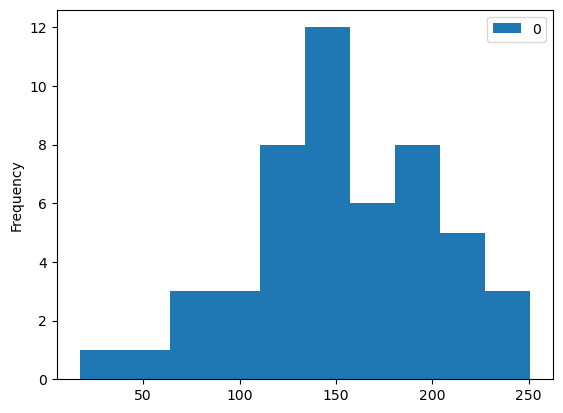

In [30]:
#histogram
pd.DataFrame(olcumler).plot.hist();

## Shapiro-Wilks Testi

H0: Örnek dağılımı ile teorik normal dağılım arasında ist. ol. anl. bir fark. yoktur

H1: ... fark vardır

In [32]:
from scipy.stats import shapiro

In [33]:
shapiro(olcumler)

ShapiroResult(statistic=0.9853105545043945, pvalue=0.7848747968673706)

In [34]:
print("T Hesap İstatistiği: " + str(shapiro(olcumler)[0]))
print("Hesaplanan P-value: " + str(shapiro(olcumler)[1]))
#p 0.05'ten büyük çıktığı için H0'ı reddetmiyoruz/kabul ediyoruz.

T Hesap İstatistiği: 0.9853105545043945
Hesaplanan P-value: 0.7848747968673706


## Hipotez Testinin Uygulanması (Tek Örneklem T Testi)

In [1]:
#Problem: Web sitemizde geçirilen ortalama süre 170 sn mi?

H0: Web sitemizde geçirilen ortalama süre 170'tir.

H1: .. 170'ten farklıdır.

In [35]:
#One sample t-test fonksiyonu:
stats.ttest_1samp(olcumler, popmean = 170)

Ttest_1sampResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446)

In [36]:
#p değeri o.o5'ten küçük olduğundan H0 reddedilir. Yani süre 170'ten farklıdır.

## Nonparametrik Tek Örneklem Testi

In [37]:
from statsmodels.stats.descriptivestats import sign_test

In [38]:
sign_test(olcumler, 170)

(-7.0, 0.06490864707227217)

In [ ]:
#p değeri 0.05'ten büyük olduğundan H0 reddedilmez.(Veriler normal dağılımda olduğundan bu sonuç geçerli değildir)

## Bağımsız İki Örneklem T Testi
İki grup ortalaması arasında karşılaştırma yapmak için kullanılır.
İki varsayımı vardır. Normallik ve varyans homojenliği

H0: M1 = M2 

H1: M1 != M2

Bir makine öğrenmesi modelinin başarısı test edilmek isteniyor. 
Eski sistem ile yeni geliştirilen modelin arasında anlamlı bir fark olup olmadığını belirlemek
Site kullanıcıları rastgele 2 gruba ayrılıyor. A grubu eski sistemi, B grubu yeni sistemi kullanıyor.
Yeni sistem etki etti mi?

In [ ]:
#VERI TIPI I

In [47]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])


A_B = pd.concat([A, B], axis = 1)
A_B.columns = ["A","B"]

A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [ ]:
#VERI TIPI II

In [44]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])

#A ve A'nın grubu
GRUP_A = np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:] = "A"
A = pd.concat([A, GRUP_A], axis = 1)

#B ve B'nin Grubu
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:] = "B"
B = pd.concat([B, GRUP_B], axis = 1)

#Tum veri
AB = pd.concat([A,B])
AB.columns = ["gelir","GRUP"]
print(AB.head())
print(AB.tail())

   gelir GRUP
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A
    gelir GRUP
25     33    B
26     26    B
27     32    B
28     33    B
29     29    B


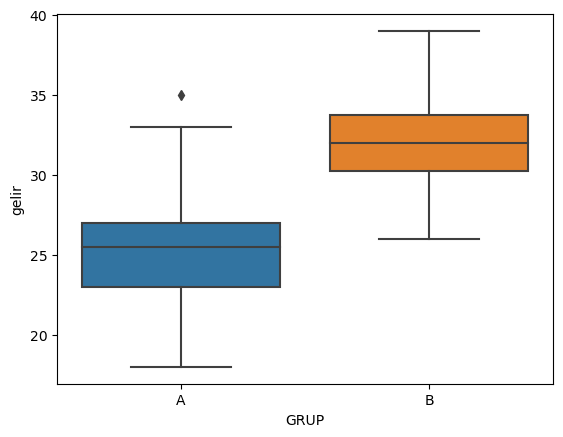

In [77]:
import seaborn as sns
sns.boxplot(x = "GRUP", y = "gelir", data = AB);

## Varsayım Kontrolü

In [48]:
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [49]:
AB.head()

,gelir,GRUP
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


In [ ]:
#normallik varsayımı

In [50]:
from scipy.stats import shapiro

In [51]:
shapiro(A_B.A)

ShapiroResult(statistic=0.9789242148399353, pvalue=0.7962799668312073)

In [52]:
shapiro(A_B.B)

ShapiroResult(statistic=0.9561261534690857, pvalue=0.2458445429801941)

In [ ]:
#varyans homojenligi varsayımı

H0: Varyanslar Homojendir

H1: Varyanslar Homojen Değildir

In [67]:
stats.levene(A_B.A, A_B.B)

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

## Hipotez Testi (Bağımsız İki Örneklem T Testi)

In [ ]:
#Bir makine öğrenmesi modelinin başarısı test edilmek isteniyor. 
# Eski sistem ile yeni geliştirilen modelin arasında anlamlı bir fark olup olmadığını belirlemek
# Site kullanıcıları rastgele 2 gruba ayrılıyor. A grubu eski sistemi, B grubu yeni sistemi kullanıyor. 
# Yeni sistem etki etti mi?

In [70]:
stats.ttest_ind(A_B["A"], A_B["B"], equal_var = True)

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

In [71]:
#p değeri karmaşık bir sayı şeklinde geldiği için düzeltme uyguluyoruz:
test_istatistigi, pvalue = stats.ttest_ind(A_B["A"], A_B["B"], equal_var=True)
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = -7.0287, p-değeri = 0.0000


In [72]:
import scipy.stats as stats

In [73]:
#Betimsel istatistikler:
stats.describe(A_B)

DescribeResult(nobs=30, minmax=(array([18, 26]), array([35, 39])), mean=array([25.46666667, 32.36666667]), variance=array([17.15402299, 11.75747126]), skewness=array([0.27471229, 0.26660199]), kurtosis=array([-0.32313214, -0.66418164]))

## Nonparametrik Bağımsız İki Örneklem Testi

In [78]:
stats.mannwhitneyu(A_B["A"], A_B["B"])

MannwhitneyuResult(statistic=89.5, pvalue=9.557950378612535e-08)

In [79]:
test_istatistigi, pvalue = stats.mannwhitneyu(A_B["A"], A_B["B"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 89.5000, p-değeri = 0.0000


# Bağımlı İki Örneklem T Testi
Bağımlı iki değer arasında karşılaştırma yapılmak istenildiğinde kullanılır.

Varsayımlar: normallik ve varyans homojenliği

Şirket içi verilen eğitimin ne kadar işe yaradığı ölçülmek isteniyor. Aynı grubun ön ve son ölçümleri karşılaştırılıyor.

In [34]:
import pandas as pd
import numpy as np

In [47]:
oncesi = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,
            121,118,124,121,125,115,115,119,118,121,117,117,120,120,
            121,117,118,117,123,118,124,121,115,118,125,115])

sonrasi = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,
             134,134,124,140,134,129,129,138,134,124,122,126,133,127,
             130,130,130,132,117,130,125,129,133,120,127,123])

In [48]:
oncesi[0:5]

,0
0,123
1,119
2,119
3,116
4,123


In [49]:
sonrasi[0:5]

,0
0,118
1,127
2,122
3,132
4,129


In [50]:
#BIRINCI VERI SETI
AYRIK = pd.concat([oncesi, sonrasi], axis = 1)
AYRIK.columns = ["ONCESI","SONRASI"]
print("'AYRIK' Veri Seti: \n\n ", AYRIK.head(), "\n\n")


#IKINCI VERI SETI
#ONCESI FLAG/TAG'INI OLUSTURMA
GRUP_ONCESI = np.arange(len(oncesi))
GRUP_ONCESI = pd.DataFrame(GRUP_ONCESI)
GRUP_ONCESI[:] = "ONCESI"
#FLAG VE ONCESI DEGERLERINI BIR ARAYA GETIRME
A = pd.concat([oncesi, GRUP_ONCESI], axis = 1)
#SONRASI FLAG/TAG'INI OLUSTURMA
GRUP_SONRASI = np.arange(len(sonrasi))
GRUP_SONRASI = pd.DataFrame(GRUP_SONRASI)
GRUP_SONRASI[:] = "SONRASI"

#FLAG VE SONRASI DEGERLERINI BIR ARAYA GETIRME
B = pd.concat([sonrasi, GRUP_SONRASI], axis = 1)

#TUM VERIYI BIR ARAYA GETIRME
BIRLIKTE = pd.concat([A,B])
BIRLIKTE

#ISIMLENDIRME
BIRLIKTE.columns = ["PERFORMANS","ONCESI_SONRASI"]
print("'BIRLIKTE' Veri Seti: \n\n", BIRLIKTE.head(), "\n")

'AYRIK' Veri Seti: 

     ONCESI  SONRASI
0     123      118
1     119      127
2     119      122
3     116      132
4     123      129 


'BIRLIKTE' Veri Seti: 

    PERFORMANS ONCESI_SONRASI
0         123         ONCESI
1         119         ONCESI
2         119         ONCESI
3         116         ONCESI
4         123         ONCESI 



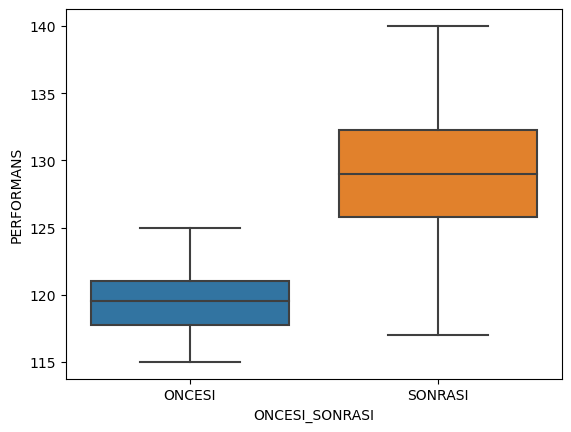

In [12]:
import seaborn as sns
sns.boxplot(x = "ONCESI_SONRASI", y = "PERFORMANS", data = BIRLIKTE);

## Varsayım Kontrolleri 

In [13]:
from scipy.stats import shapiro

In [14]:
shapiro(AYRIK.ONCESI)

ShapiroResult(statistic=0.9543654918670654, pvalue=0.10722342133522034)

In [15]:
shapiro(AYRIK.SONRASI)

ShapiroResult(statistic=0.9780087471008301, pvalue=0.6159457564353943)

In [16]:
import scipy.stats as stats
stats.levene(AYRIK.ONCESI, AYRIK.SONRASI)

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

In [ ]:
#Homojenlik varsayımı sağlanmıyor. Aykırı değerler incelenip çıkarılıp denenebilir.

## Hipotez Testi

In [17]:
stats.ttest_rel(AYRIK.ONCESI, AYRIK.SONRASI)

Ttest_relResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11)

In [18]:
test_istatistigi, pvalue = stats.ttest_rel(AYRIK["ONCESI"], AYRIK["SONRASI"])
print('Test İstatistiği = %.5f, p-değeri = %.5f' % (test_istatistigi, pvalue))

Test İstatistiği = -9.28153, p-değeri = 0.00000


## Nonparametrik Bağımlı İki Örneklem Testi

In [19]:
stats.wilcoxon(AYRIK.ONCESI, AYRIK.SONRASI)

WilcoxonResult(statistic=15.0, pvalue=2.491492033374464e-07)

In [20]:
test_istatistigi, pvalue = stats.wilcoxon(AYRIK["ONCESI"], AYRIK["SONRASI"])

print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 15.0000, p-değeri = 0.0000


# Varyans Analizi
2'den fazla grup olduğunda kullanılar hipotez testidir. 
Varsayımları:

Gözlemlerin birbirinden bağımsız olması (Grupların bağımsızlığı)

Normal dağılım

Varyans homojenliği

### Anasayfa içerik stratejisi belirleme problemi.
İnsanların web sitesinde geçirdikleri süreyi artırmak hedefleniyor. 3 tarz haber var. 
A: Doğal şekilde
B: Yönlendirici
C: İlgi çekici

Hangi haber tarzına odaklanırsak süreyi artırırız?

H0: M1 = M2 = M3 (grup ortalamalari arasinda ist anl. farklilik yoktur) 

H1: Fark vardir.

In [24]:
A = pd.DataFrame([28,33,30,29,28,29,27,31,30,32,28,33,25,29,27,31,31,30,31,34,30,32,31,34,28,32,31,28,33,29])

B = pd.DataFrame([31,32,30,30,33,32,34,27,36,30,31,30,38,29,30,34,34,31,35,35,33,30,28,29,26,37,31,28,34,33])

C = pd.DataFrame([40,33,38,41,42,43,38,35,39,39,36,34,35,40,38,36,39,36,33,35,38,35,40,40,39,38,38,43,40,42])

dfs = [A, B, C]

ABC = pd.concat(dfs, axis = 1)
ABC.columns = ["GRUP_A","GRUP_B","GRUP_C"]
ABC.head()

,GRUP_A,GRUP_B,GRUP_C
0,28,31,40
1,33,32,33
2,30,30,38
3,29,30,41
4,28,33,42


## Varsayım Kontrolü

In [101]:
from scipy.stats import shapiro

In [102]:
shapiro(ABC["GRUP_A"])

ShapiroResult(statistic=0.9697431921958923, pvalue=0.5321715474128723)

In [103]:
shapiro(ABC["GRUP_B"])

ShapiroResult(statistic=0.9789854884147644, pvalue=0.7979801297187805)

In [104]:
shapiro(ABC["GRUP_C"])

ShapiroResult(statistic=0.9579201340675354, pvalue=0.273820161819458)

In [105]:
stats.levene(ABC["GRUP_A"], ABC["GRUP_B"],ABC["GRUP_C"])

LeveneResult(statistic=1.0267403645055275, pvalue=0.36247110117417064)

## Hipotez Testi

In [106]:
from scipy.stats import f_oneway

In [110]:
f_oneway(ABC["GRUP_A"], ABC["GRUP_B"],ABC["GRUP_C"])

F_onewayResult(statistic=74.69278140730431, pvalue=1.3079050746811477e-19)

In [111]:
test=f_oneway(ABC["GRUP_A"], ABC["GRUP_B"],ABC["GRUP_C"])

In [112]:
print('{:.5f}'.format(test[1]))

0.00000


In [113]:
ABC.describe().T

,count,mean,std,min,25%,50%,75%,max
GRUP_A,30.0,30.133333,2.224214,25.0,28.25,30.0,31.75,34.0
GRUP_B,30.0,31.700000,2.937862,26.0,30.00,31.0,34.00,38.0
GRUP_C,30.0,38.100000,2.808239,33.0,36.00,38.0,40.00,43.0


## Nonparametrik Hipotez Testi

In [115]:
from scipy.stats import kruskal

In [116]:
kruskal(ABC["GRUP_A"], ABC["GRUP_B"],ABC["GRUP_C"])

KruskalResult(statistic=54.19819735523783, pvalue=1.7022015426175926e-12)

In [121]:
print('{:.5f}'.format(kruskal(ABC["GRUP_A"], ABC["GRUP_B"],ABC["GRUP_C"])[1]))

0.00000


## Korelasyon Analizi
Varsayımlar:

Normallik

Sağlanıyorsa pearson, sağlanmıyorsa spearman

Bahşiş veri seti:

total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

tip: bahşiş

sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

smoker: grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: ne zaman? (0=Day, 1=Night)

size: grupta kaç kişi var?

In [25]:
import seaborn as sns
tips = sns.load_dataset('tips')
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [26]:
df["total_bill"] = df["total_bill"] - df["tip"]

In [124]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


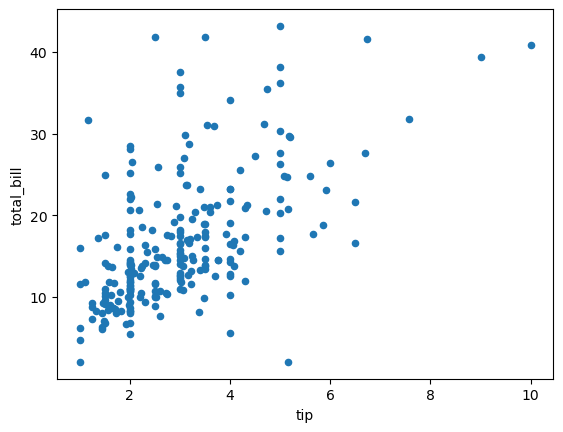

In [125]:
df.plot.scatter("tip","total_bill");

# Varsayım Kontrolü

In [126]:
from scipy.stats import shapiro

In [127]:
test_istatistigi, pvalue = shapiro(df["tip"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

test_istatistigi, pvalue = shapiro(df["total_bill"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 0.8978, p-değeri = 0.0000
Test İstatistiği = 0.9136, p-değeri = 0.0000


In [ ]:
#Normal dağılım varsayımı sağlanamadı.

# Hipotez Testi

### Korelasyon Katsayısı Elde Etme

In [28]:
df["tip"].corr(df["total_bill"])

0.5766634471096381

In [134]:
df["total_bill"].corr(df["tip"])

0.5766634471096383

In [133]:
df["tip"].corr(df["total_bill"], method = "spearman")

0.593691939408997

### Korelasyonunu Anlamlılığının Testi

In [29]:
from scipy.stats.stats import pearsonr

In [30]:
test_istatistigi, pvalue = pearsonr(df["tip"],df["total_bill"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.5767, p-değeri = 0.0000


In [32]:
pearsonr(df["tip"],df["total_bill"])

(0.5766634471096377, 5.01829008494899e-23)

## Nonparametrik Hipotez Testi

In [13]:
from scipy.stats import stats
stats.spearmanr(df["tip"],df["total_bill"])

SpearmanrResult(correlation=0.593691939408997, pvalue=1.2452285137560276e-24)

In [15]:
test_istatistigi, pvalue = stats.spearmanr(df["tip"],df["total_bill"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.5937, p-değeri = 0.0000
